# Introduction to `matplotlib` and Line Plots

## Setup

### Importing Required Libraries

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import requests
import os

%matplotlib inline

### Importing the dataset

In [2]:
dir_path = os.path.join(".", "data")
os.makedirs(dir_path, exist_ok=True)

def download_file(url: str) -> str:
    with requests.get(url=url, stream=True) as response:
        response.raise_for_status()

        filepath = os.path.join(dir_path, url.rsplit("/", 1)[-1])

        total_size = int(response.headers.get("Content-Length", 0))
        chunk_size = 1024 ** 2
        download_size = 0

        with open(filepath, "wb") as file:
            for chunk in response.iter_content(chunk_size=chunk_size):
                if not chunk:
                    continue

                file.write(chunk)
                download_size += len(chunk)

                if total_size > 0:
                    progress = (download_size / total_size) * 100
                    print(f"Downloading: {progress:.2f}% ({download_size} / {total_size} bytes)")

    print("Download Complete.")
    return filepath

<p>Let's download and import our primary Canadian Immigration dataset using <code>pandas</code>'s <code>read_csv()</code> method.</p>

In [3]:
data_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv"
filename = download_file(data_url)

Downloading: 100.00% (34893 / 34893 bytes)
Download Complete.


In [4]:
df = pd.read_csv(filename)

<p>Let's view the top 5 rows of the dataset using the <code>head()</code> function.</p>

In [5]:
df.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


<p>Let's set Country as the index, it will help you to plot the charts easily, by refering to the country names as index value.</p>

In [6]:
df = df.set_index("Country")
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


## Visualizing Data using `matplotlib`

<p>What is <code>matplotlib</code> ?</p>
<p>The primary plotting library we will explore in this course is <a href="https://matplotlib.org/">matplotlib</a>. As mentioned on their website:</p>

> Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. Matplotlib can be used in Python scripts, the Python and IPython shell, the jupyter notebook, web application servers, and four graphical user interface toolkits.

<p>If you are aspiring to create impactful visualization with Python, <code>matplotlib</code> is an essential tool to have at your disposal.</p>

### `matplotlib.pyplot`

<p>One of the core aspects of <code>matplotlib</code> is <code>matplotlib.pyplot</code>. It is <code>matplotlib</code>'s scripting layer which we studied in details in the videos about it. Recall that it is a collection of command style functions that make <code>matplotlib</code> work like <b>MATLAB</b>. Each <code>pyplot</code> function makes some change to a figure such as creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc. In this lab, we will work with the scripting layer to learn how to generate line plots. In future labs, we will get to work with the Artist layer as well to experiment first hand how it differs from the scripting layer.</p>

<p>Check if <code>matplotlib</code> is loaded.</p>

In [7]:
mpl.__version__

'3.10.5'

<p>Apply a style to it.</p>

In [8]:
plt.style.use(["ggplot"])

### Plotting in `pandas`

<p>Fortunately, <code>pandas</code> has a built-in implementation of <code>matplotlib</code> that we can use. Plotting in <code>pandas</code> is as simple as appending a <code>plot()</code> method to a series or data frame.</p>
<p>Documentation:</p>
<ul>
    <li><a href="https://pandas.pydata.org/pandas-docs/stable/api.html#plotting">Plotting with Series</a></li>
    <li><a href="https://pandas.pydata.org/pandas-docs/stable/api.html#api-dataframe-plotting">Plotting with Dataframes</a></li>
</ul>

## Line Pots (Series / Dataframe)

<p><b>What is a line plot and why use it?</b></p>
<p>A line chart or line plot is a type of plot which displays information as a series of data points called 'markers' connected by straight line segments. It is a basic type of chart common in many fields.</p>
<p>Use line plot when you have a continuous data set. These are best suited for trend-based visualizations of data over a period of time.</p>

<p><b>Let's start with a case study:</b></p>
<p>In 2010, Haiti suffered a catastrophic magnitude 7.0 earthquake. The quake caused widespread devastation and loss of life and about three million people were affected by this natural disaster. As part of Canada's humanitarian effort, the Government of Canada stepped up its effort in accepting refugees from Haiti. We can quickly visualize this effort using a <code>Line</code> plot:</p>
<p><b>Question:</b> Plot a line graph of immigration from <b>Haiti</b> using <code>dataframe.plot()</code>.</p>

<p>First, we will extract the data series for <b>Haiti</b>.</p>

In [9]:
years = list(map(str, range(1980, 2014)))
haiti = df.loc["Haiti", years]
haiti.head()

1980    1666
1981    3692
1982    3498
1983    2860
1984    1418
Name: Haiti, dtype: object

<p>Next, we will plot a line plot by appending <code>plot()</code> to the <code>haiti</code> dataframe.</p>

<Axes: >

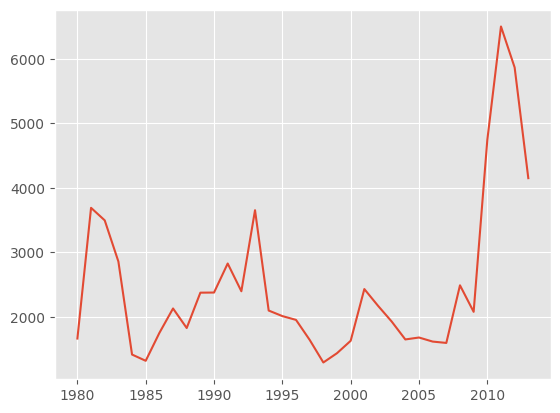

In [10]:
haiti.plot()

<p><code>Pandas</code> automatically populated the x-axis with the index values (year), and the y-axis with the column values (population).</p>
<p>Also, let's label the x and y axis using <code>plt.title()</code>, <code>plt.ylabel()</code>, and <code>plt.xlabel()</code> as follows:</p>

Text(0.5, 0, 'Years')

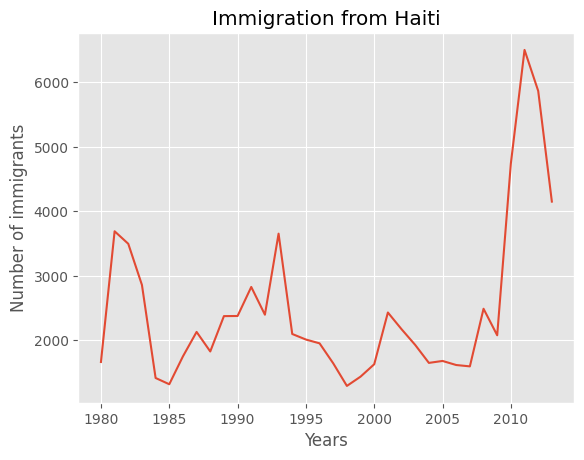

In [11]:
haiti.plot(kind="line")

plt.title("Immigration from Haiti")
plt.ylabel("Number of immigrants")
plt.xlabel("Years")

<p>We can clearly notice how number of immigrants from <b>Haiti</b> spiked up from 2010 as Canada stepped up its efforts to accept refugees from <b>Haiti</b>. Let's annotate this spike in the plot by using the <code>plt.text()</code> method.</p>
<p>However, notice that years are of type <code>string</code>. Let's change the type of the index values to <code>integer</code>first.</p>

Text(2000, 6000, '2010 Earthquake')

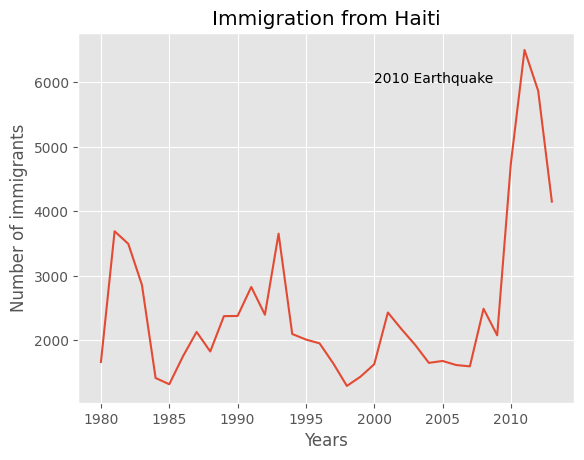

In [12]:
haiti.index = haiti.index.map(int)
haiti.plot(kind="line")

plt.title("Immigration from Haiti")
plt.ylabel("Number of immigrants")
plt.xlabel("Years")

plt.text(2000, 6000, "2010 Earthquake")

<p>With just a few lines of code, you were able to quickly identify and visualize the spike in immigration!</p>
<p>Quick note on x and y values in <code>plt.text(x, y, label)</code>:</p>
<ul>
    <li>
    Since the x-axis (years) is type <code>integer</code>, we specified x as a year. The y axis (number of immigrants) is type <code>integer</code>, so we can just specify the value y=6000.
    <pre>plt.text(2000, 6000, "2010 Earthquake") # years stored as type int</pre>
    </li>
    <li>
    If the years were stored as type <code>string</code>, we would need to specify x as the index position of the year. For example, 20th index is year 2000 since it is the 20th year with a base year of 1980.
    <pre>plt.text(20, 6000, "2010 Earthquake") # years stored as type string</pre>
    </li>
</ul>
<p>We will cover advanced annotation methods in later modules.</p>

<p>We can easily add more countries to line plot to make meaningful comparisons immigration from different countries.</p>
<p><b>Question:</b> Let's compare the number of immigrants from India and China from 1980 to 2013.</p>

<p>Step 1: Get the dataset for China and India, and display the dataframe.</p>

In [13]:
df_cn_in = df.loc[["China", "India"], years]
df_cn_in

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087


<p>Step 2: Plot graph. We will explicitly specify line plot by passing in <code>kind</code> parameter to <code>plot()</code>.</p>

<Axes: xlabel='Country'>

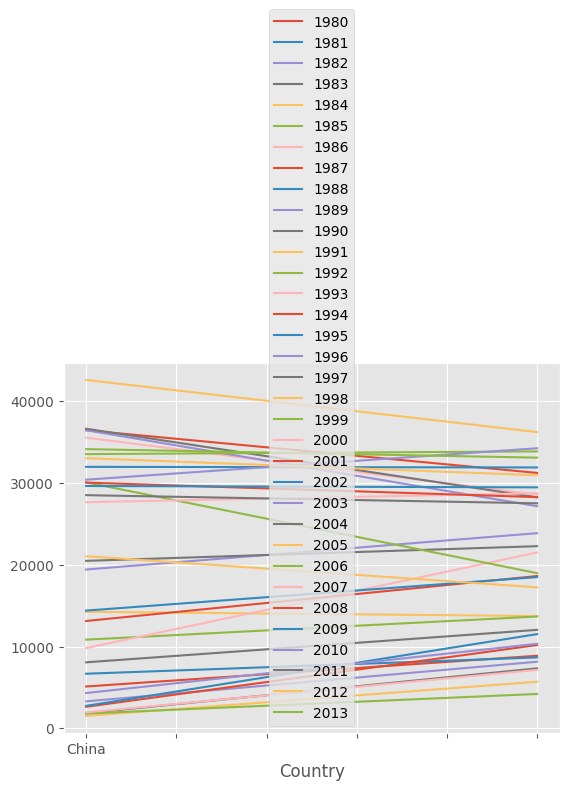

In [14]:
df_cn_in.plot(kind="line")

<p>That doesn't look right...</p>
<p>Recall that <code>pandas</code> plots the indices on the x-axis and the columns as individual lines on the y-axis. Since <code>df_cn_in</code> is a dataframe with the <code>country</code> as the index and <code>years</code> as the columns, we mast first transpose the dataframe using <code>transpose()</code> method to swap the row and columns.</p>

In [15]:
df_cn_in = df_cn_in.transpose()
df_cn_in.head()

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


<p><code>Pandas</code> will automatically graph the two countries on the same graph. Go ahead and plot the new transposed dataframe. Make sure to add a title to the plot and label the axes.<p>

Text(0.5, 0, 'Years')

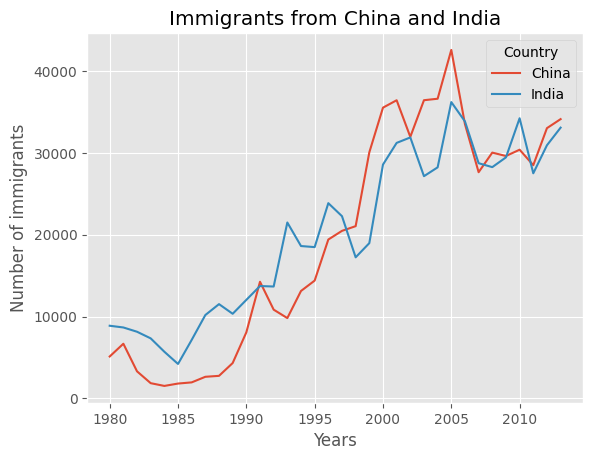

In [16]:
df_cn_in.index = df_cn_in.index.map(int)
df_cn_in.plot(kind="line")

plt.title("Immigrants from China and India")
plt.ylabel("Number of immigrants")
plt.xlabel("Years")

<p>From the above plot, we can observe that China and India have very similar immigration trends through the years.</p>
<p><b>Note:</b> How come we didn't need to transpose Haiti's dataframe before plotting (like we did for <code>df_cn_in</code>) ?</p>
<p>That's because <code>haiti</code> is a Series as opposed to a dataframe, and has the years as its indices as shown below.</p>

In [17]:
type(haiti)

pandas.core.series.Series

In [18]:
haiti.head()

1980    1666
1981    3692
1982    3498
1983    2860
1984    1418
Name: Haiti, dtype: object

<p>Line plot is a handly tool to display several dependent variables against one independent variable. However, it is recommended that no more than 5-10 lines on a single graph. Any more than that and it becomes difficult to interpret.</p>
<p><b>Question:</b> Compare the trend of top 5 countries that contributed the most to immigration to Canada.</p>

In [19]:
df = df.sort_values(by="Total", ascending=False, axis=0)
df_top5 = df.head()
df_top5 = df_top5[years].transpose()
df_top5

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668
1985,4211,1816,9564,3150,514
1986,7150,1960,9470,4166,691
1987,10189,2643,21337,7360,1072
1988,11522,2758,27359,8639,1334
1989,10343,4323,23795,11865,2261


Text(0.5, 0, 'Years')

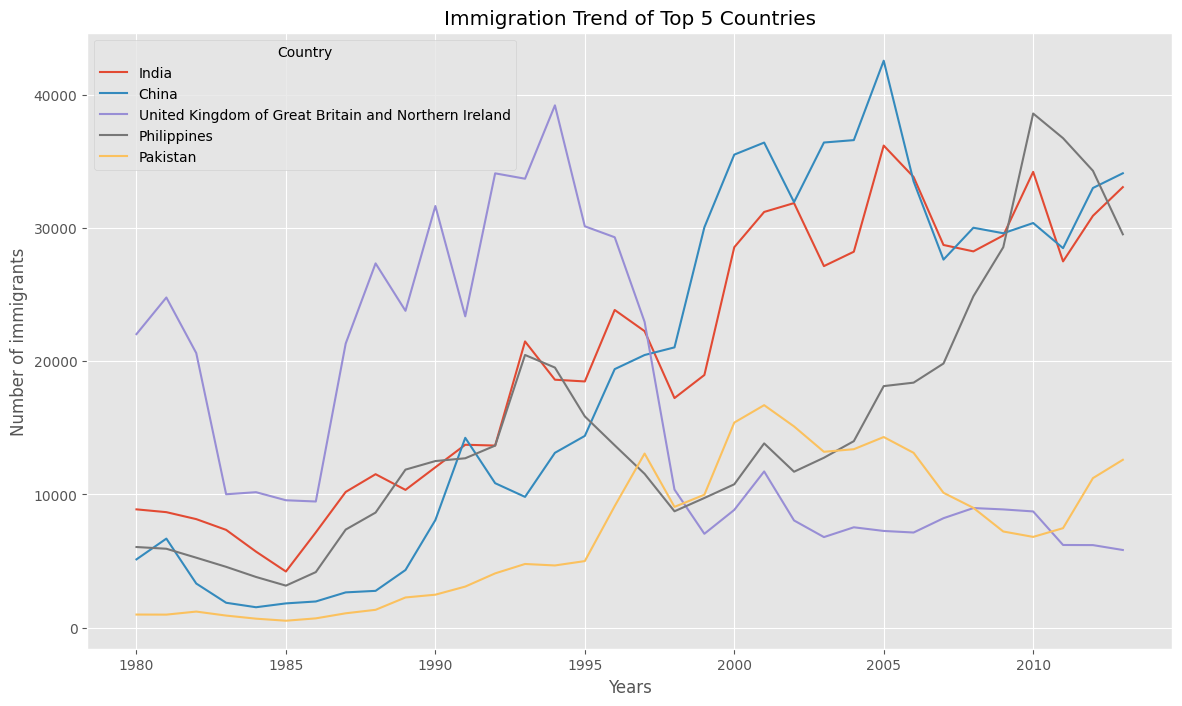

In [20]:
df_top5.index = df_top5.index.map(int)
df_top5.plot(kind="line", figsize=(14, 8))

plt.title("Immigration Trend of Top 5 Countries")
plt.ylabel("Number of immigrants")
plt.xlabel("Years")

## Other Plots

<p>Now you have learned how to wrangle data with Python and create a line plot with <code>matplotlib</code>. There are many other plotting styles available other than the default Line plot, all of which can be accessed by passing <code>kind</code> keyword to <code>plot()</code>. The full list of available plots are as follows:</p>
<ul>
    <li><code>bar</code> for vertical bar plots</li>
    <li><code>barh</code> for horizontal bar plots</li>
    <li><code>hist</code> for histogram</li>
    <li><code>box</code> for boxplot</li>
    <li><code>kde</code> or <code>density</code> for density plots</li>
    <li><code>area</code> for area plots</li>
    <li><code>pie</code> for pie plots</li>
    <li><code>scatter</code> for scatter plots</li>
    <li><code>hexbin</code> for hexbin plot</li>
</ul>

****
This is the end of the file.
****